# Project Name - FILM TRENDS

# Defining the question

## Specific question 
The objective is to determine and analyse which type of films are currently trending and doing the best. We will predict this with the data we have and reviews.

# 1. Business Understanding
With the vast growth of original video content by leading entertainment platforms(like Netflix, Disney+, Prime), our company saw this as a huge opportunity to join the film industry. The goal is to launch a new movie studio capable of producing content that resonates with the current demand. 

Despite wanting to venture into this sector, our company still lack the industry-specific knowledge and experience in film production. To make informed investment decisions and reduce the risk of launching unsuccessful films, the company must understand which type of movies are currently performing best in the market. 

# 1.1 OBJECTIVES

## 1.1.1 Main objective
To determine which type of films are currently doing the best

## 1.1.2 Specific Objective
- To identify what genres are doing well
- Understand how factors like release date affect movie's performance
- Does runtime influence the rating
- Do specific directors, writers, and publishers correlate to revenue
- To check the average revenue over the years

# 1.2 Defining the Metric of Success
To come up with reccomendations That will best suit the businness objective

# Experimental Design
Below is the expected workflow:

* Data Cleaning and preparation
 * Loading our libraries and dataset
 * Dealing with missing values
 * Dealing with duplicates

* Performing EDA
 * Univariate Analysis
 * Bivariate Analysis
   

* Conclusion

* Recommendations

# Data Relevance
We are using data from three different entertainment platforms: IMDb, Box Office Mojo, and Rotten Tomatoes. We are going to check how these entertainment industries have performed and what factors affected the success of a particular movie. 

## Data Reading

In [4485]:
# import the necessary libraries
import pandas as pd
import seaborn as sns # for visualization
import matplotlib.pyplot as plt # for visualization
import sqlite3 # for sql queries
import numpy as np #for numeric calculations
import zipfile #reading zipfile

In [4486]:
# unzip the imdb database
zip_path = "zippeddata/im.db.zip"
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("unzipped_db")

In [4487]:
# connect to the extracted.db file
conn = sqlite3.connect("unzipped_db/im.db")
cur =conn.cursor()

In [4488]:
# load datasets from Box Office Mojo
movie_gross =pd.read_csv("zippeddata/bom.movie_gross.csv.gz")

In [4489]:
#load dataset from Rotten Tomatoes
rt_movie_info = pd.read_csv("zippeddata/rt.movie_info.tsv.gz",sep ='\t')
rt_reviews = pd.read_csv("zippeddata/rt.reviews.tsv.gz" ,sep='\t', encoding ='latin1')

# Data Exploration

In [4491]:
# Previewing the top of box office Mojo movie_gross
movie_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


Our Target variable is the studio,year, foreign gross and domestic gross

In [4493]:
# preview the top of rt_movie_info
rt_movie_info.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [4494]:
#preview the top of rt_reviews dataset
rt_reviews.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [4495]:
#list all tables in the im.db database
cursor = conn.cursor()
cursor.execute(" SELECT name FROM sqlite_master WHERE type ='table';")
tables = cursor.fetchall()
print("Tables:", tables)

Tables: [('movie_basics',), ('directors',), ('known_for',), ('movie_akas',), ('movie_ratings',), ('persons',), ('principals',), ('writers',)]


We are mainly intrested in the movie_rating,directos,writers and movie_basics tables


In [4497]:
q= """
SELECT * 
FROM movie_ratings;
"""
pd.read_sql(q, conn)

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [4498]:
q= """
SELECT * 
FROM movie_basics;
"""
pd.read_sql(q, conn)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [4499]:
# Joining the movie_basics and ratings on movie_id
q= ("""SELECT * 
               FROM movie_basics
               JOIN movie_ratings 
               USING(movie_id);""")
imdb_dataset=pd.read_sql(q,conn)
imdb_dataset

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...,...,...,...,...
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136
73853,tt9914642,Albatross,Albatross,2017,NaN,Documentary,8.5,8
73854,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,None,6.6,5


The columns we are interested in are the genres,start_year, the averagerating, runtime_minutes and the primary title

## Data Cleaning

### Box Mojo office datase

In [4503]:
movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


from the info aabove we notice that the domestic_gross and foreign gross  are strings while they ought to be int type

In [4505]:
movie_gross["domestic_gross"]= movie_gross["domestic_gross"].astype('Int64')
movie_gross['foreign_gross'] = movie_gross['foreign_gross'].str.replace(',', '')
movie_gross["foreign_gross"]= movie_gross["foreign_gross"].astype(float)


we have changed the columns domestic_gross and foreign gross into numeric data, to enable calculations to be done

In [4507]:
movie_gross.duplicated().sum()

0

There are no duplicates

In [4509]:
movie_gross.isnull().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

There are several missing values in foreign gross column

### rt_reviews dataset

In [4512]:
rt_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


The rating column is in string type and we need it in float type

In [4514]:
# checking the different type of rating 
rt_reviews["rating"].unique()

array(['3/5', nan, 'C', '2/5', 'B-', '2/4', 'B', '3/4', '4/5', '4/4',
       '6/10', '1/4', '8', '2.5/4', '4/10', '2.0/5', '3/10', '7/10', 'A-',
       '5/5', 'F', '3.5/4', 'D+', '1.5/4', '3.5/5', '8/10', 'B+', '9/10',
       '2.5/5', '7.5/10', '5.5/10', 'C-', '1.5/5', '1/5', '5/10', 'C+',
       '0/5', '6', '0.5/4', 'D', '3.1/5', '3/6', '4.5/5', '0/4', '2/10',
       'D-', '7', '1/10', '3', 'A+', 'A', '4.0/4', '9.5/10', '2.5',
       '2.1/2', '6.5/10', '3.7/5', '8.4/10', '9', '1', '7.2/10', '2.2/5',
       '0.5/10', '5', '0', '2', '4.5', '7.7', '5.0/5', '8.5/10', '3.0/5',
       '0.5/5', '1.5/10', '3.0/4', '2.3/10', '4.5/10', '4/6', '3.5',
       '8.6/10', '6/8', '2.0/4', '2.7', '4.2/10', '5.8', '4', '7.1/10',
       '5/4', 'N', '3.5/10', '5.8/10', 'R', '4.0/5', '0/10', '5.0/10',
       '5.9/10', '2.4/5', '1.9/5', '4.9', '7.4/10', '1.5', '2.3/4',
       '8.8/10', '4.0/10', '2.2', '3.8/10', '6.8/10', '7.3', '7.0/10',
       '3.2', '4.2', '8.4', '5.5/5', '6.3/10', '7.6/10', '8.1/10',
  

There are different type of rating, we need to standardize this in order to get uniform ratings


In [4516]:
def safe_rating_to_float(rating_str):
    try:
        if isinstance(rating_str, str) and '/' in rating_str:
            rating_str = rating_str.strip()
            num, den = rating_str.split('/')
            return (float(num) / float(den)) * 10  # Normalize to scale of 10
        elif float(rating_str) > 10:
            return float(rating_str)/10
        else:
           return float(rating_str)  
    except: 
      return None
    

In [4517]:
rt_reviews["rating_scaled_10"] = rt_reviews['rating'].apply(safe_rating_to_float)

We have normalized the rating column to a scale of 10 to enapble us to perform analysis

### rt_movie_info dataset

In [4520]:
rt_movie_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


We need the box _office and runtime column in numerical form

In [4522]:
# cleaning the runtime column to be numeric
rt_movie_info['runtime_clean'] = rt_movie_info['runtime'].str.extract(r'(\d+)').astype(float)

In [4523]:
# removing the comma in box_office column
rt_movie_info["box_office"] = rt_movie_info["box_office"].str.replace(",", "")
# changing the box_office to numeric
rt_movie_info["box_office"] = rt_movie_info["box_office"].astype(float)

In [4524]:
# lets merge the rt_movie_info and rt_review
rt_df= pd.merge(rt_movie_info, rt_reviews, on= 'id')

In [4525]:
rt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                54432 non-null  int64  
 1   synopsis          54300 non-null  object 
 2   rating_x          54346 non-null  object 
 3   genre             54345 non-null  object 
 4   director          48992 non-null  object 
 5   writer            45206 non-null  object 
 6   theater_date      53206 non-null  object 
 7   dvd_date          53206 non-null  object 
 8   currency          33310 non-null  object 
 9   box_office        33310 non-null  float64
 10  runtime           53594 non-null  object 
 11  studio            40125 non-null  object 
 12  runtime_clean     53594 non-null  float64
 13  review            48869 non-null  object 
 14  rating_y          40915 non-null  object 
 15  fresh             54432 non-null  object 
 16  critic            51710 non-null  object

In [4526]:
rt_df.isnull().sum()

id                      0
synopsis              132
rating_x               86
genre                  87
director             5440
writer               9226
theater_date         1226
dvd_date             1226
currency            21122
box_office          21122
runtime               838
studio              14307
runtime_clean         838
review               5563
rating_y            13517
fresh                   0
critic               2722
top_critic              0
publisher             309
date                    0
rating_scaled_10    19987
dtype: int64

### There are several missing values in the following columns:
1. director
2. writer
3. theater date
4. dvd date
5. currency
6. box office
7. studio
8. rating y

### IMDB dataset

In [4529]:
imdb_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  66236 non-null  float64
 5   genres           73052 non-null  object 
 6   averagerating    73856 non-null  float64
 7   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 4.5+ MB


In [4530]:
imdb_dataset.duplicated().sum()

0

0 duplicates

In [4532]:
imdb_dataset.isnull().sum()

movie_id              0
primary_title         0
original_title        0
start_year            0
runtime_minutes    7620
genres              804
averagerating         0
numvotes              0
dtype: int64

The runtime_minutes column and genres have missing values

## Dealing with missing values

### Box Office Mojo Dataset

In [4536]:
# imputing missing values in the domestic gross column
movie_gross['domestic_gross']=movie_gross['domestic_gross'].fillna(movie_gross['domestic_gross'].median())
movie_gross['foreign_gross']=movie_gross['foreign_gross'].fillna(movie_gross['foreign_gross'].median())

We input the missing values with the median, since there are outliers in the columns domestic gross and foreign gross.

In [4538]:
# exporting movie gross 
movie_gross.to_csv('Box_Office_Mojo.csv' , index= False)

### Rotten Tomatoes Dataset

In [4540]:
# Imputation for currency 
rt_movie_info['currency']=rt_movie_info['currency'].fillna('$')

Reason for filling the currency with this $ sign is because that's the only data in that row



In [4542]:
# filling hthe director,studio, dvd_date,studio,rating_y with unkwown
rt_movie_info["director"]=rt_movie_info["director"].fillna("unknown")
rt_movie_info["studio"]=rt_movie_info["studio"].fillna("unknown")
rt_movie_info["dvd_date"]=rt_movie_info["dvd_date"].fillna("unknown")
rt_reviews["rating"]=rt_reviews["rating"].fillna("unknown")
rt_movie_info["box_office"]=rt_movie_info["box_office"].fillna("unknown")

We fill the columns with the term unknown because dropping them will hinder performance analysis

In [4544]:
# exporting rt_df dataset
rt_df.to_csv('rotten_tomatoes.csv', index =False)

### IMDB dataset

In [4546]:
imdb_dataset.fillna("unknown")

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,unknown,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...,...,...,...,...
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136
73853,tt9914642,Albatross,Albatross,2017,unknown,Documentary,8.5,8
73854,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,unknown,unknown,6.6,5


Filled the runtime_minutes and genres with unknown to avoid hinderance of our analysis

In [4548]:
# exporting my IMDb dataset
imdb_dataset.to_csv('imdb_dataset.csv', index =False)

# EDA

## univariate analysis

### The Box Office Mojo Dataset

In [4552]:
# Statistical summary for the box office domestic gross
print("Maximum Total domestic gross:", (movie_gross["domestic_gross"].max()))
print("Minimum Total domestic gross:", (movie_gross["domestic_gross"].min()))
print("Mean of the Total domestic gross:", (movie_gross["domestic_gross"].mean()))
print("Modal Total domestic gross:", (movie_gross["domestic_gross"].mode()))
print("Median Total domestic gross", (movie_gross["domestic_gross"].median()))

Maximum Total domestic gross: 936700000
Minimum Total domestic gross: 100
Mean of the Total domestic gross: 28519779.62208444
Modal Total domestic gross: 0    1400000
Name: domestic_gross, dtype: Int64
Median Total domestic gross 1400000.0


The maximum domestic gross is 936,700,000
Minimum total domestic gross is 100
The mean is 28,745,845

<Axes: ylabel='domestic_gross'>

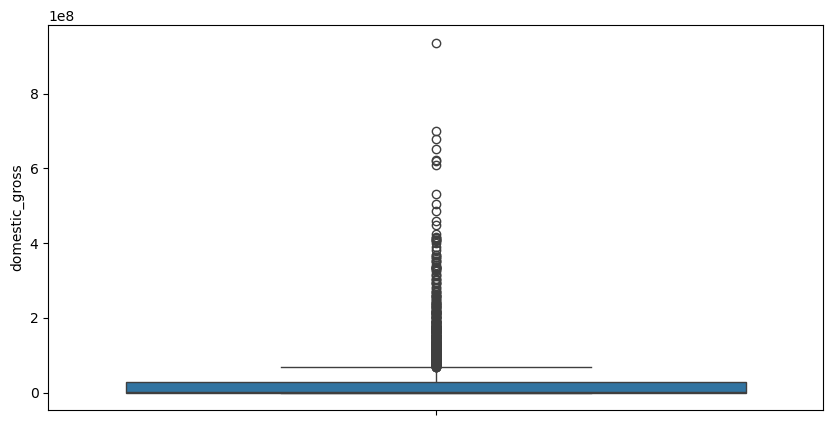

In [4554]:
plt.figure(figsize= (10,5))
sns.boxplot(movie_gross["domestic_gross"])

In [4555]:
# Statistical summary for the box office foreign gross
print("Maximum Total foreign gross:", (movie_gross["foreign_gross"].max()))
print("Minimum Total foreign gross:", (movie_gross["foreign_gross"].min()))
print("Mean of the Total foreign gross:", (movie_gross["foreign_gross"].mean()))
print("Modal Total foreign gross:", (movie_gross["foreign_gross"].mode()))
print("Median Total foreign gross", (movie_gross["foreign_gross"].median()))

Maximum Total foreign gross: 960500000.0
Minimum Total foreign gross: 600.0
Mean of the Total foreign gross: 52483293.261440806
Modal Total foreign gross: 0    18700000.0
Name: foreign_gross, dtype: float64
Median Total foreign gross 18700000.0


The naximum total foreign gross is 960,500,000.The minimum is 600.The mean is 74,872,810(meaning that the mean foreign gross is higher compared to domestic gross)

<Axes: ylabel='foreign_gross'>

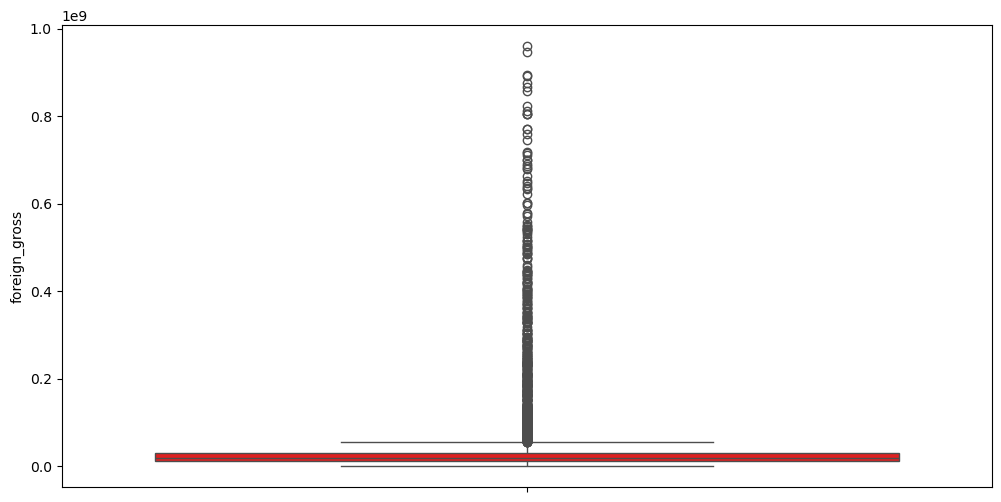

In [4557]:
plt.figure(figsize= (12,6))
sns.boxplot(movie_gross["foreign_gross"],color="red")

In [4558]:
# checking unique type of studios
movie_gross["studio"].value_counts()

studio
IFC           166
Uni.          147
WB            140
Fox           136
Magn.         136
             ... 
E1              1
PI              1
ELS             1
PalT            1
Synergetic      1
Name: count, Length: 257, dtype: int64

The IFC has the highest number of title movies produced 166
, Uni follows at 147 and WB at 140

In [4560]:
# checking the years
movie_gross["year"].value_counts()

year
2015    450
2016    436
2012    400
2011    399
2014    395
2013    350
2010    328
2017    321
2018    308
Name: count, dtype: int64

2015  has the highest number of titles produced, followed by 2016 and then 2013

### The IMDB dataset

In [4563]:
q= ("""SELECT * 
               FROM movie_basics
               JOIN movie_ratings 
               USING(movie_id);""")
pd.read_sql(q,conn)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...,...,...,...,...
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136
73853,tt9914642,Albatross,Albatross,2017,NaN,Documentary,8.5,8
73854,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,None,6.6,5


In [4564]:
# checking the genre count
imdb_dataset["genres"].value_counts()

genres
Drama                        11612
Documentary                  10313
Comedy                        5613
Horror                        2692
Comedy,Drama                  2617
                             ...  
Sport,Thriller                   1
Comedy,Sport,Western             1
Action,Music                     1
Comedy,Sci-Fi,Western            1
Documentary,Family,Sci-Fi        1
Name: count, Length: 923, dtype: int64

Drama genres has the highest number of movies according to this dataset, with the general rating 

In [4566]:
imdb_dataset['averagerating'].unique()

array([ 7. ,  7.2,  6.9,  6.1,  6.5,  4.1,  8.1,  6.8,  4.6,  7.6,  7.5,
        7.8,  4. ,  8.8,  1.9,  6.7,  6.6,  5.9,  7.1,  7.4,  3.9,  5.5,
        5.1,  7.9,  6.2,  6.3,  5. ,  6. ,  5.6,  7.3,  4.9,  6.4,  3.3,
        5.7,  8.6,  4.8,  4.5,  4.2,  8.7,  4.7,  5.2,  8.3,  9.1,  3.4,
        5.8,  5.4,  8.5,  3.2,  3.6,  8. ,  3.8,  7.7,  4.3,  3. ,  5.3,
        3.7,  3.5,  9.3,  8.9,  9. ,  2.3,  8.2,  2.7,  2.8,  1.7,  4.4,
        2.2,  9.4,  8.4,  9.2,  9.7,  3.1, 10. ,  9.8,  2.6,  2.5,  1.4,
        2.1,  2.4,  2.9,  1.8,  1.6,  2. ,  1. ,  1.2,  1.5,  1.3,  1.1,
        9.5,  9.6,  9.9])

The average rating seems to be clean and having the required inputs out of 10

In [4568]:
q= ("""SELECT *
               FROM movie_basics
               JOIN movie_ratings 
               USING(movie_id)
               WHERE averagerating >= 7;""")
rating_above7=pd.read_sql(q,conn)


In [4569]:
rating_above7['genres'].value_counts()

genres
Documentary                  6836
Drama                        4065
Comedy                       1209
Comedy,Drama                  819
Biography,Documentary         444
                             ... 
Documentary,News,Thriller       1
Animation,Comedy,Romance        1
Fantasy,History,Music           1
Comedy,Family,Mystery           1
Action,Mystery                  1
Name: count, Length: 680, dtype: int64

The top 5 genres with the average rating of 7 and above that are watched are Documentary at 6836, Drama at 4065, comedy at 1209,  comedy|drama at 819 and finally biography|Documentary at 444 

### rt dataset

In [4572]:
# Statistical summary of box office

print("Maximum box office currency:", (rt_df["box_office"].max()))
print("Minimum box office currency:", (rt_df["box_office"].min()))
print("Mean box office currency:", (rt_df["box_office"].mean()))
print("Median box office currency:", (rt_df["box_office"].median()))
print("Modal box office currency:", (rt_df["box_office"].mode()))

Maximum box office currency: 368000000.0
Minimum box office currency: 363.0
Mean box office currency: 53154331.18940258
Median box office currency: 26800000.0
Modal box office currency: 0    52000189.0
Name: box_office, dtype: float64


The maximum amount is 368,000,000 dollars minimum is 363 dollars and the mean box office amount is 53,154,331

<Axes: ylabel='box_office'>

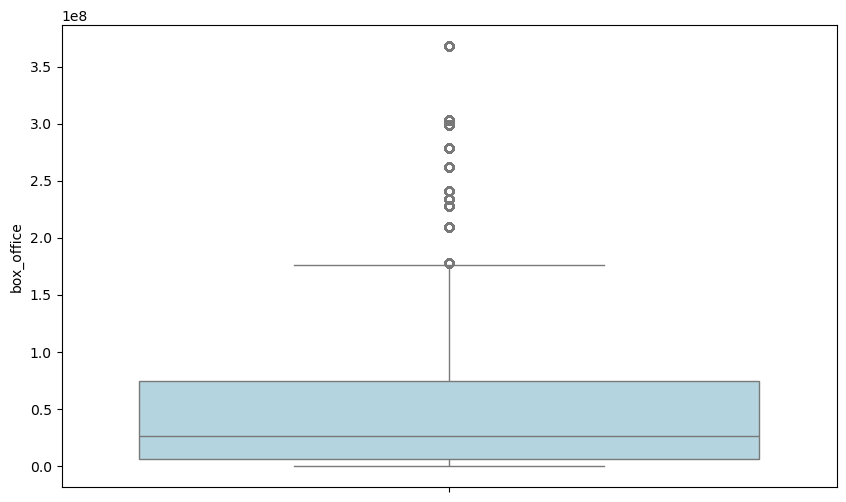

In [4574]:
# box plot indicating the distibution of the amounts
plt.figure(figsize= (10,6))
sns.boxplot(rt_df['box_office'], color='lightblue')

<Axes: ylabel='rating_scaled_10'>

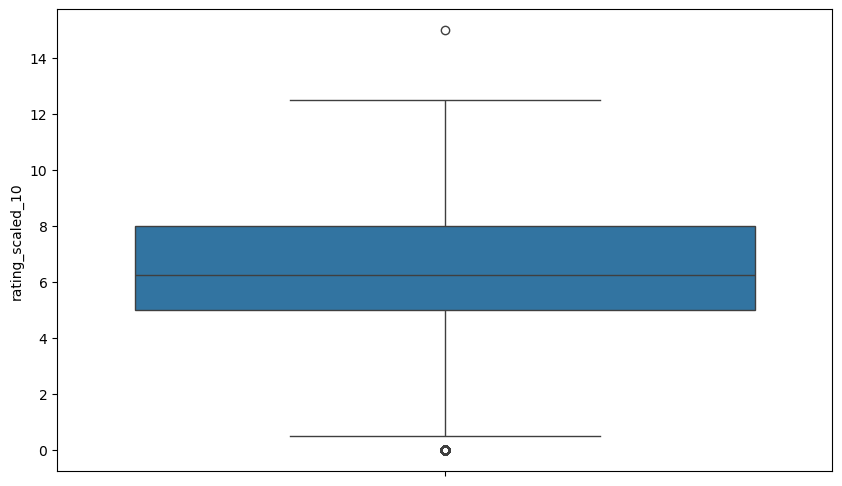

In [4575]:
plt.figure(figsize=(10,6))
sns.boxplot(rt_df['rating_scaled_10'])

In [4576]:
rt_df['rating_scaled_10'].describe()

count    34445.000000
mean         6.204636
std          2.175012
min          0.000000
25%          5.000000
50%          6.250000
75%          8.000000
max         15.000000
Name: rating_scaled_10, dtype: float64

Checking the box plot there seem to be an outliers since we made our column to be scaled out of 10 the value 15 is beyond our range.

In [4578]:
# having only rating that are reasonable <= 10
rt_df=rt_df[rt_df['rating_scaled_10']<=10]

We have decided to drop values that are greater than 10 since they are unreasonable to our analysis

- create a subset of the dataframe for data tha has a rating scale of greater than 7

In [4581]:
rtdf_high_rated= rt_df[rt_df['rating_scaled_10'] >= 7]
rtdf_high_rated

,id,synopsis,rating_x,genre,director,writer,theater_date,dvd_date,currency,box_office,...,studio,runtime_clean,review,rating_y,fresh,critic,top_critic,publisher,date,rating_scaled_10
14,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,600000.0,...,Entertainment One,108.0,For those who like their Cronenberg thick and ...,3/4,fresh,Marty Mapes,0,Movie Habit,"October 20, 2012",7.5
16,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,600000.0,...,Entertainment One,108.0,For one of the smartest films I've seen in a w...,4/5,fresh,Patrick Kolan,0,Shotgun Cinema,"September 26, 2012",8.0
19,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,600000.0,...,Entertainment One,108.0,A black comedy as dry and deadpan as a bleache...,4/4,fresh,John Beifuss,0,"Commercial Appeal (Memphis, TN)","September 10, 2012",10.0
22,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,600000.0,...,Entertainment One,108.0,"... a movie about a sentient zombie, trapped i...",8,fresh,Philip Martin,0,Arkansas Democrat-Gazette,"September 7, 2012",8.0
31,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,600000.0,...,Entertainment One,108.0,If there has ever been a point in human histor...,7/10,fresh,Tim Brayton,0,Antagony &amp; Ecstasy,"August 31, 2012",7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54393,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,...,NaN,101.0,NaN,4/5,fresh,Scott Weinberg,0,eFilmCritic.com,"July 25, 2002",8.0
54397,2000,"Suspended from the force, Paris cop Hubert is ...",R,Action and Adventure|Art House and Internation...,NaN,Luc Besson,"Sep 27, 2001","Feb 11, 2003",NaN,NaN,...,Columbia Pictures,94.0,A bubbly international cocktail.,3.5/5,fresh,Jurgen Fauth,0,About.com,"October 15, 2003",7.0
54412,2000,"Suspended from the force, Paris cop Hubert is ...",R,Action and Adventure|Art House and Internation...,NaN,Luc Besson,"Sep 27, 2001","Feb 11, 2003",NaN,NaN,...,Columbia Pictures,94.0,Reno himself can take credit for most of the m...,3/4,fresh,Jeffrey M. Anderson,0,Combustible Celluloid,"October 4, 2002",7.5
54420,2000,"Suspended from the force, Paris cop Hubert is ...",R,Action and Adventure|Art House and Internation...,NaN,Luc Besson,"Sep 27, 2001","Feb 11, 2003",NaN,NaN,...,Columbia Pictures,94.0,The spaniel-eyed Jean Reno infuses Hubert with...,3/4,fresh,Megan Turner,1,New York Post,"September 27, 2002",7.5


In [4582]:
rtdf_high_rated['genre'].value_counts()

genre
Drama                                                                      2327
Comedy|Drama                                                               1418
Drama|Mystery and Suspense                                                  870
Comedy                                                                      744
Action and Adventure|Drama|Mystery and Suspense                             574
                                                                           ... 
Western                                                                       1
Classics|Comedy|Kids and Family|Romance                                       1
Classics|Horror|Musical and Performing Arts|Science Fiction and Fantasy       1
Action and Adventure|Documentary|Television                                   1
Comedy|Drama|Science Fiction and Fantasy|Romance                              1
Name: count, Length: 223, dtype: int64

We are working with 15,008 rows and 21 columns

In [4584]:
rtdf_high_rated['studio'].value_counts()

studio
Universal Pictures          970
Paramount Pictures          843
Sony Pictures Classics      737
Warner Bros. Pictures       573
The Weinstein Company       516
                           ... 
Summit Entertainment.         1
WARNER BROTHERS PICTURES      1
Revolver Entertainment        1
Vivendi Entertainment         1
Fox International             1
Name: count, Length: 148, dtype: int64

Universal Pictures has the highest number of movies 970, followed by Paramount Pictures at 843 and Sony Pictures Classics at 737 with ratings above 7

In [4586]:
rtdf_high_rated['publisher'].value_counts()

publisher
Chicago Sun-Times          285
eFilmCritic.com            284
Filmcritic.com             201
San Francisco Chronicle    184
TV Guide                   184
                          ... 
Unknown2                     1
Low IQ Canadian              1
Movie-Vault.com              1
Clothes on Film              1
Utah Weekly                  1
Name: count, Length: 765, dtype: int64

Chicago Sun-Times has the highest number at 285, followed closely by eFilmCritic.com at 284

## Bivariate Analysis

### Box Office Dataset

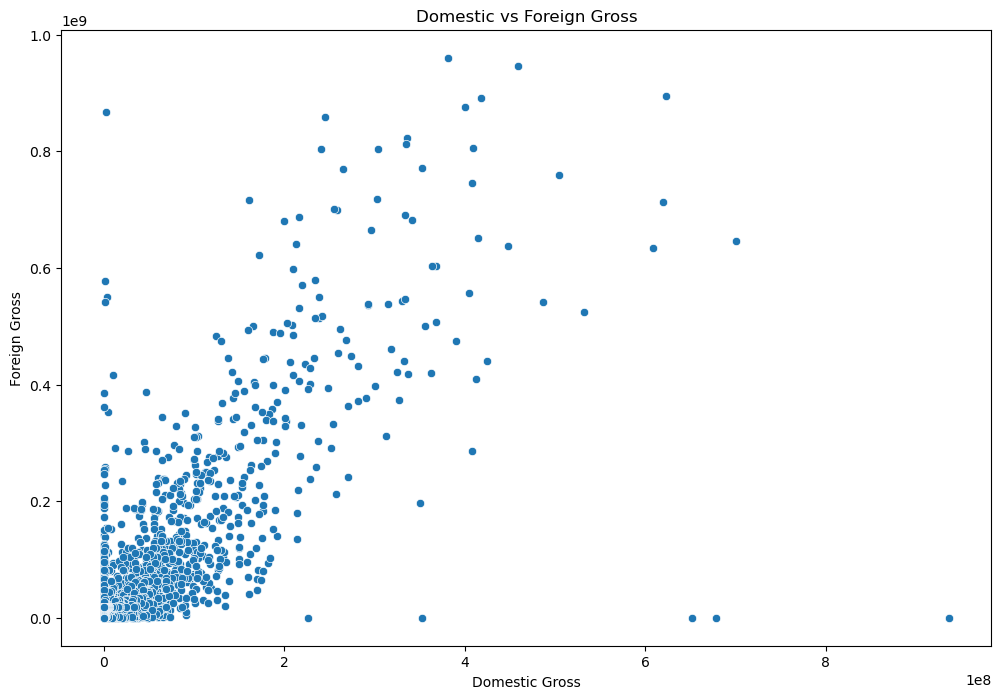

In [4590]:
# do movies that do well domestically also do well internationaly?
plt.figure(figsize = (12,8))
sns.scatterplot(data = movie_gross, x= 'domestic_gross', y= 'foreign_gross')
plt.title("Domestic vs Foreign Gross")
plt.xlabel("Domestic Gross")
plt.ylabel("Foreign Gross")
plt.show()       

There is a linear relationship between movies doing well domestically and internationally

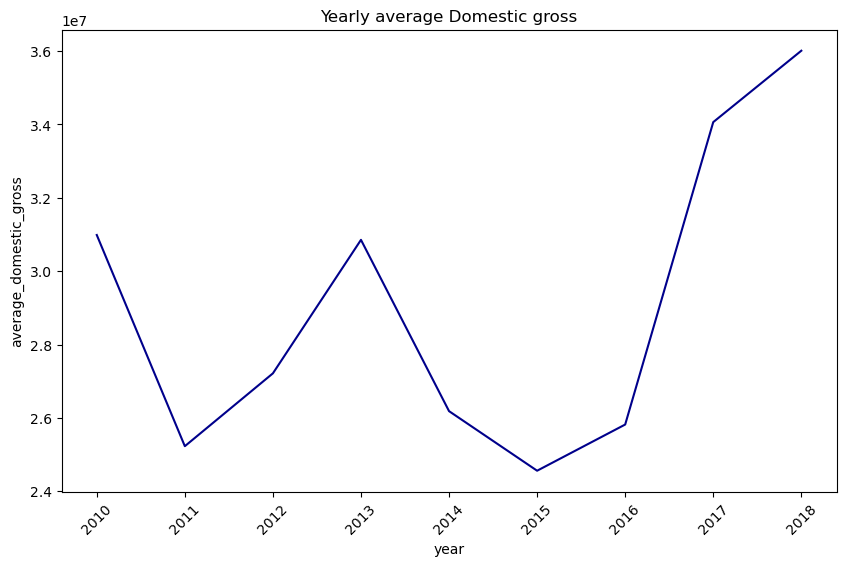

In [4592]:
# graph of domesticgross by year
yearly_avg_domesticgross = movie_gross.groupby('year')['domestic_gross'].mean().reset_index()

plt.figure(figsize=(10,6))
sns.lineplot(data= yearly_avg_domesticgross, x = 'year', y= 'domestic_gross', color= 'darkblue')
plt.title("Yearly average Domestic gross")
plt.ylabel("average_domestic_gross")
plt.xlabel("year")
plt.xticks(rotation=45)
plt.show()

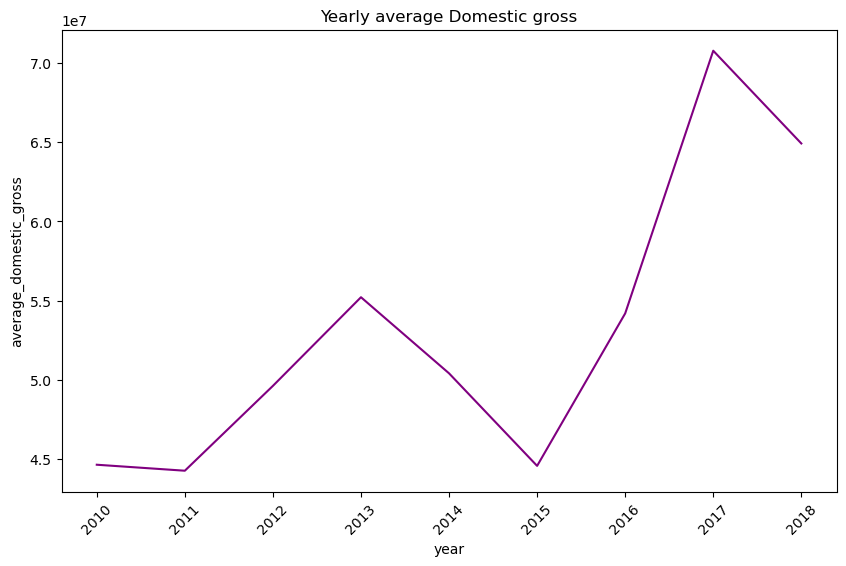

In [4593]:
# grapph by average rating
yearly_avg_foreigngross = movie_gross.groupby('year')['foreign_gross'].mean().reset_index()

plt.figure(figsize=(10,6))
sns.lineplot(data= yearly_avg_foreigngross, x = 'year', y= 'foreign_gross', color= 'purple')
plt.title("Yearly average Domestic gross")
plt.ylabel("average_domestic_gross")
plt.xlabel("year")
plt.xticks(rotation=45)
plt.show()

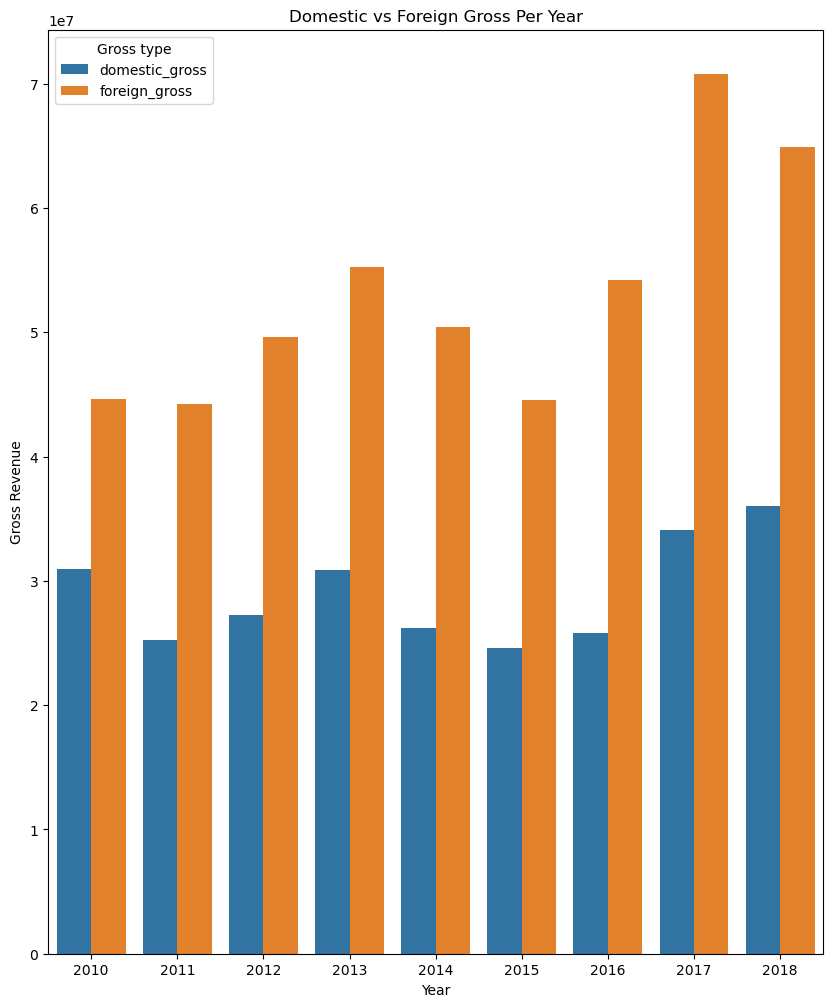

In [4594]:
# grapph by average rating
df_long = pd.melt(movie_gross, id_vars='year', value_vars=['domestic_gross', 'foreign_gross'],
                  var_name='Gross type', value_name='gross')
plt.figure(figsize=(10,12))
sns.barplot(data= df_long, x = 'year', y= 'gross', hue='Gross type', errorbar=None)
plt.title("Domestic vs Foreign Gross Per Year")
plt.ylabel("Gross Revenue")
plt.xlabel("Year")
plt.show()

### rt Dataset

In [4596]:
# drop NaN on runtime_clean column and rating scaled_10
df_plot = rt_df[['runtime_clean', 'rating_scaled_10']].dropna()

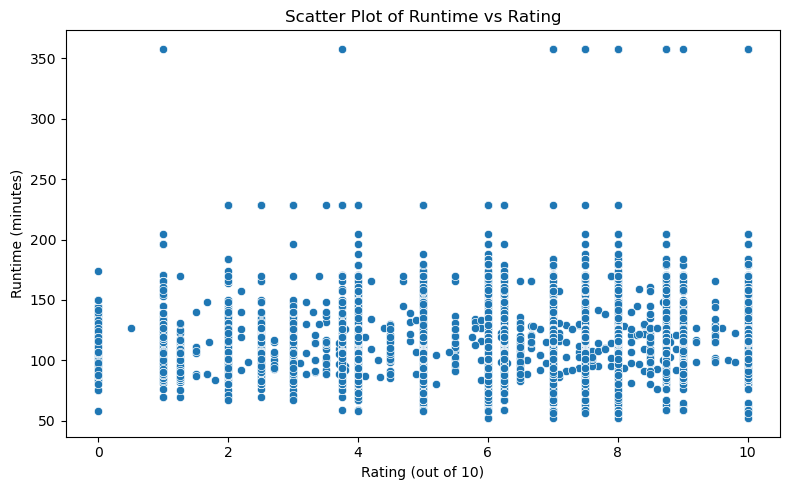

In [4597]:
# scatter plot for runtime vs rating
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_plot, y='runtime_clean', x='rating_scaled_10')

plt.ylabel('Runtime (minutes)')
plt.xlabel('Rating (out of 10)')
plt.title('Scatter Plot of Runtime vs Rating')
plt.tight_layout()
plt.show()

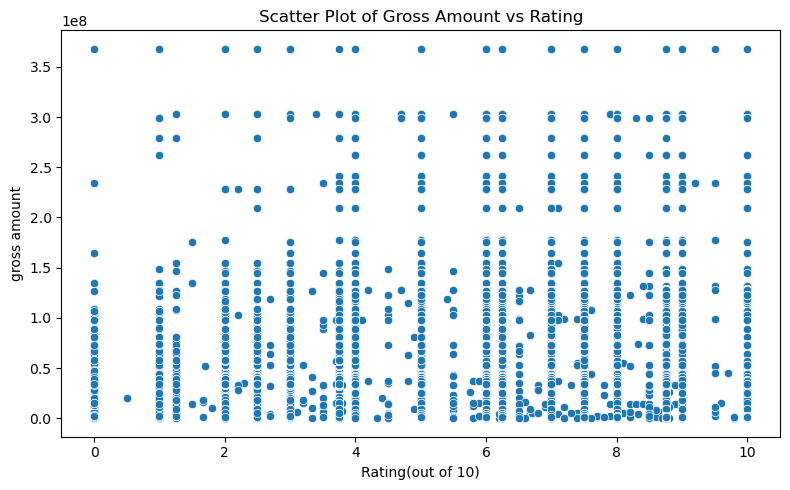

In [4598]:
# scatter plot for runtime vs rating
plt.figure(figsize=(8, 5))
sns.scatterplot(data=rt_df_clean, y='box_office', x='rating_scaled_10')

plt.xlabel('Rating(out of 10)')
plt.ylabel('gross amount')
plt.title('Scatter Plot of Gross Amount vs Rating')
plt.tight_layout()
plt.show()

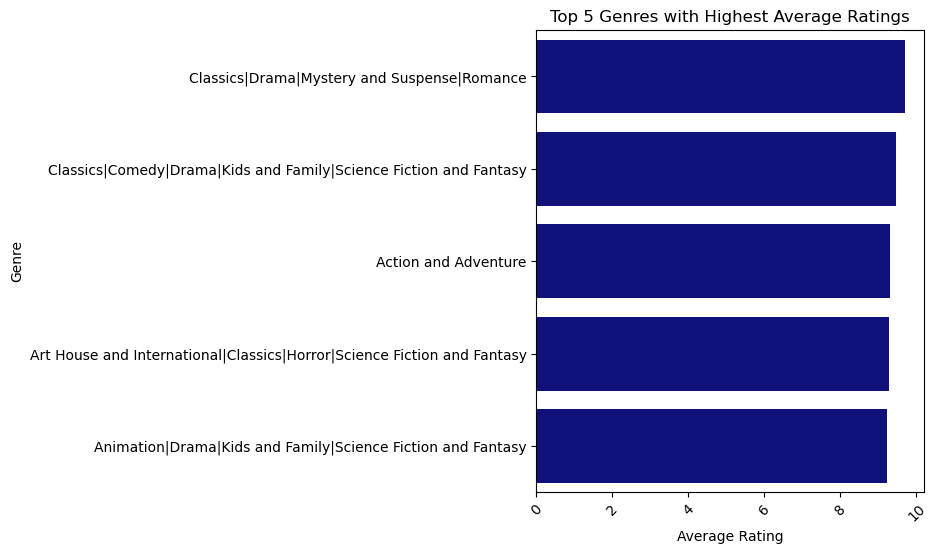

In [4599]:
# graph by average rating
genre_avg_rating = rtdf_high_rated.groupby('genre')['rating_scaled_10'].agg(['mean','count']).reset_index()
filtered_genre =genre_avg_rating[genre_avg_rating['count'] >=10]
top5_genres = filtered_genre.sort_values(by= 'mean', ascending = False).head(5)

plt.figure(figsize=(5,6))
sns.barplot(data= top5_genres, y = 'genre', x= 'mean', color= 'darkblue')
plt.title("Top 5 Genres with Highest Average Ratings")
plt.ylabel("Genre")
plt.xlabel("Average Rating")
plt.xticks(rotation=45)
plt.show()

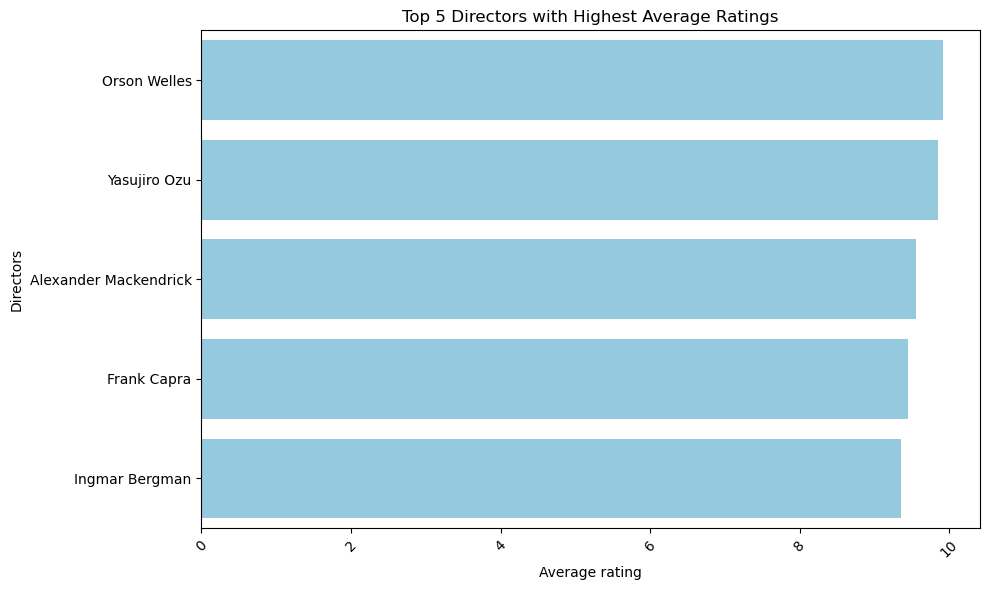

In [4600]:
director_avg_rating = rtdf_high_rated.groupby('director')['rating_scaled_10'].agg(['mean','count']).reset_index()
# make the ranking fairer, we filter to a minimum number of movies
filtered_directors =director_avg_rating[director_avg_rating['count'] >=10]
top5_directors = filtered_directors.sort_values(by= 'mean', ascending = False).head(5)

plt.figure(figsize=(10,6))
sns.barplot(data= top5_directors, y = 'director', x= 'mean', color= 'skyblue')
plt.title("Top 5 Directors with Highest Average Ratings")
plt.xlabel("Average rating")
plt.ylabel("Directors")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

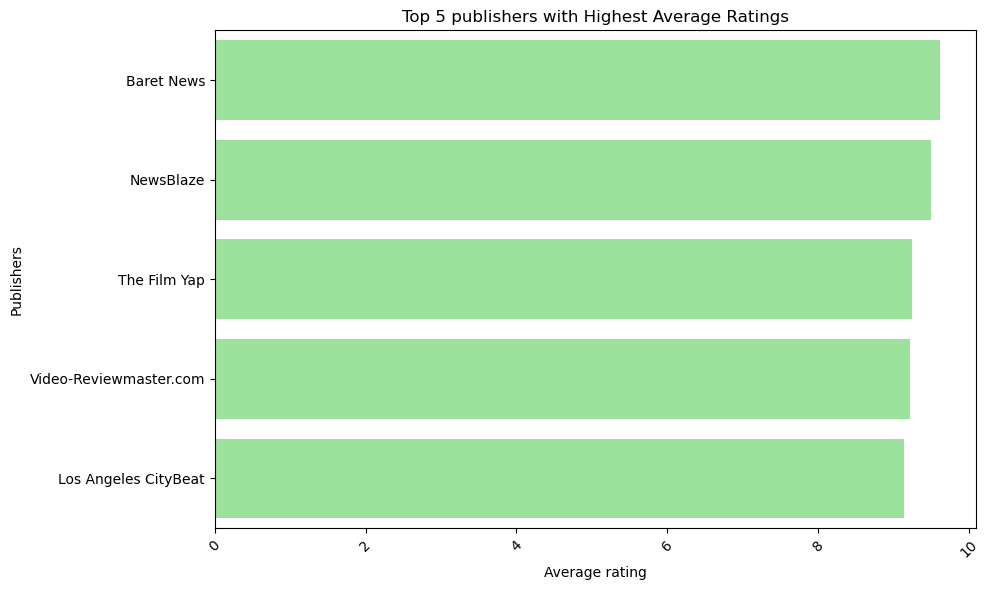

In [4601]:
publisher_avg_rating = rtdf_high_rated.groupby('publisher')['rating_scaled_10'].agg(['mean','count']).reset_index()
filtered_publishers =publisher_avg_rating[publisher_avg_rating['count'] >=10]
top5_publisher = filtered_publishers.sort_values(by= 'mean', ascending = False).head(5)

plt.figure(figsize=(10,6))
sns.barplot(data= top5_publisher, y = 'publisher', x= 'mean', color= 'lightgreen')
plt.title("Top 5 publishers with Highest Average Ratings")
plt.xlabel("Average rating")
plt.ylabel("Publishers")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

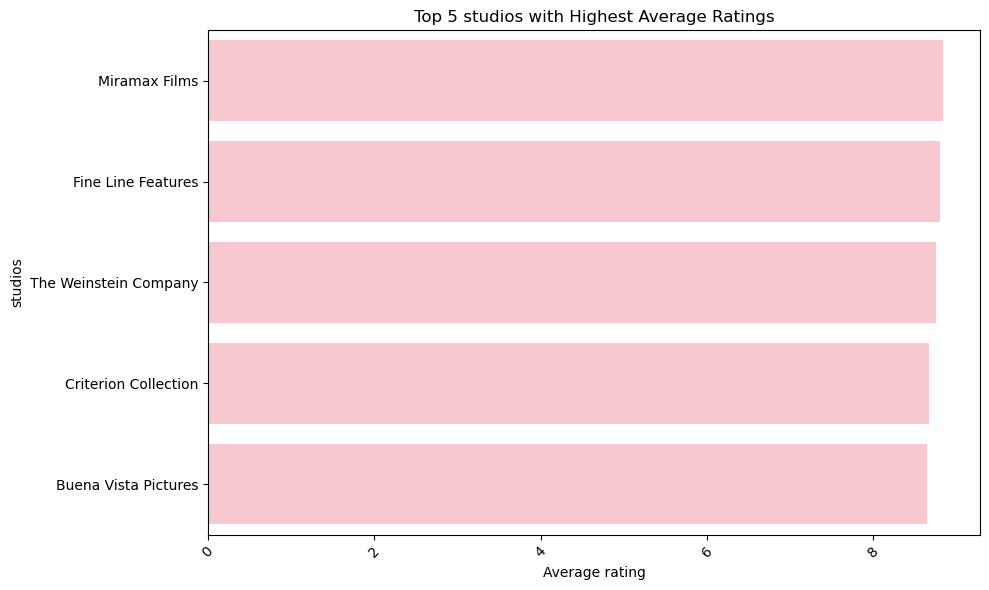

In [4602]:
studio_avg_rating = rtdf_high_rated.groupby('studio')['rating_scaled_10'].agg(['mean','count']).reset_index()
filtered_studio =studio_avg_rating[studio_avg_rating['count'] >=3]
top5_studios = filtered_studio.sort_values(by= 'mean', ascending = False).head(5)

plt.figure(figsize=(10,6))
sns.barplot(data= top5_studios, y = 'studio', x= 'mean', color= "pink")
plt.title("Top 5 studios with Highest Average Ratings")
plt.xlabel("Average rating")
plt.ylabel("studios")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### IMDB dataset

In [4604]:
# runtime minutes vs rating
q= ("""SELECT runtime_minutes, averagerating
               FROM movie_basics
               JOIN movie_ratings 
               USING(movie_id)
               WHERE averagerating >=7;""")
rating_df=pd.read_sql(q,conn)

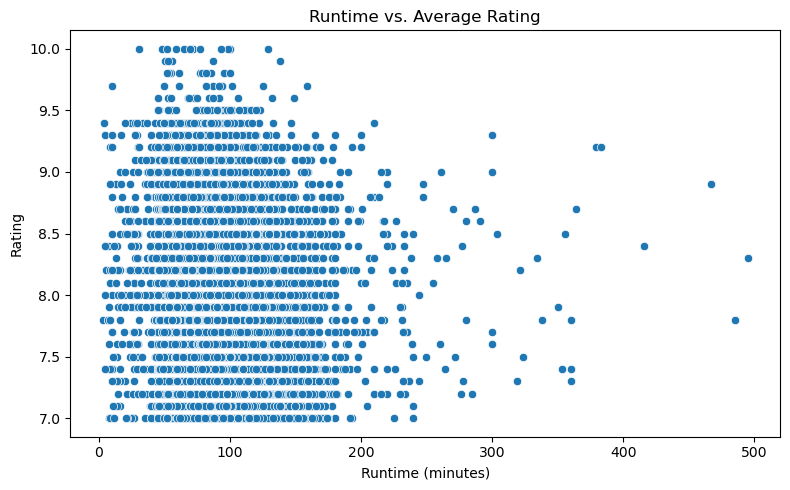

In [4605]:
rating_df_filtered=rating_df[rating_df['runtime_minutes'] <= 500]
plt.figure(figsize=(8,5))
sns.scatterplot(data= rating_df_filtered, x='runtime_minutes', y= 'averagerating')
plt.title("Runtime vs. Average Rating")
plt.xlabel("Runtime (minutes)")
plt.ylabel("Rating")
plt.tight_layout()
plt.show()


Movies with runtime minutes between 50 and 180 are dense

In [4607]:
q= ("""SELECT start_year, averagerating
               FROM movie_basics
               JOIN movie_ratings 
               USING(movie_id)
               WHERE averagerating >= 7
               ;""")
year_df=pd.read_sql(q,conn)

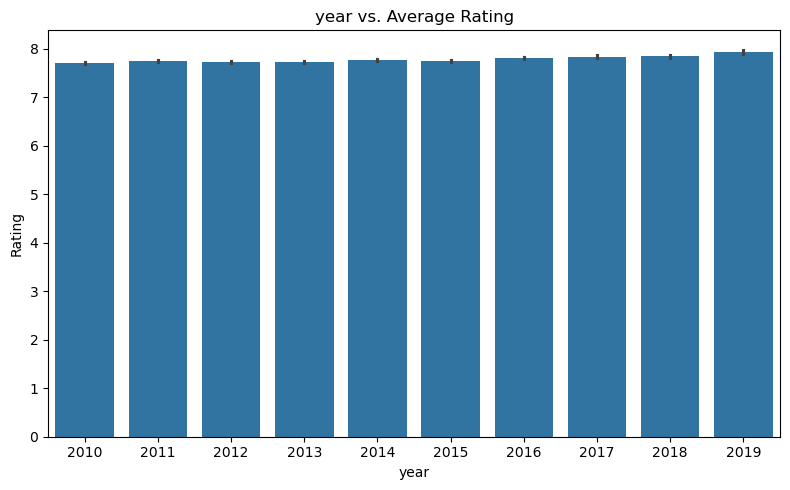

In [4608]:
# year vs average rating
plt.figure(figsize=(8,5))
sns.barplot(data= year_df, x='start_year', y= 'averagerating')
plt.title("year vs. Average Rating")
plt.xlabel("year")
plt.ylabel("Rating")
plt.tight_layout()
plt.show()


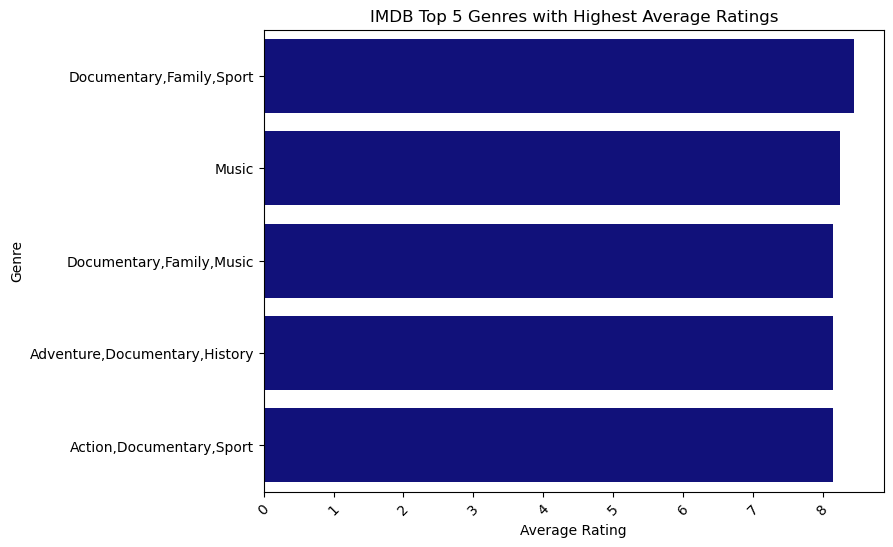

In [4609]:
genre_avg_rating = rating_above7.groupby('genres')['averagerating'].agg(['mean','count']).reset_index()
filtered_genre =genre_avg_rating[genre_avg_rating['count'] >=10]
top5_genres = filtered_genre.sort_values(by= 'mean', ascending = False).head(5)

plt.figure(figsize=(8,6))
sns.barplot(data= top5_genres, y = 'genres', x= 'mean', color= 'darkblue')
plt.title("IMDB Top 5 Genres with Highest Average Ratings")
plt.ylabel("Genre")
plt.xlabel("Average Rating")
plt.xticks(rotation=45)
plt.show()

# Conclusions
1. The genres that are doing well across the platform are: drama, comedy, Documentary, horror, drama|comedy
2. Domestic gross and foreign gross have a linear relationship, a movie that does well domestically also does well internationally
3. There are specific publishers, studios, and directors who have a higher average rating compared to others
4. Movies tend to do well internationally compared to locally
5. Movies that have ratings above 7, majority of them have a runtime between 50 and 200
   

# Recommendations
1. The company should focus on movies that have drama, comedy, are horror, documentary, Action,Romance and a mixture of all
2. When releasing a movie, they can make it available both locally and internationally
3. They can do a test run of how the movie does locally and release it to the rest of the world
4. The following directors have a higher average rating( Orson Welles, Yasujiro Ozu, ,Alexander Mackendrick, Preston Sturges). I would recommend them to be used when directing movies because they are consistent and have a higher rating.
5. I would recommend the following studios as a priority: Independent Film Company, Universal, Paramount, Sony, Weinstein, Fox, Warner Bros
6. Produce movies should have a runtime between 50 and 200

## Tableau Visualization Links
To view my Tableau dashboards
1. [Dashboard 1](https://public.tableau.com/app/profile/latifa.riziki/viz/phase2project_17543476299090/Dashboard1?publish=yes)
2. [Dashboatd 2](https://public.tableau.com/app/profile/latifa.riziki/viz/phase2project_17543476299090/Dashboard2?publish=yes)